<a href="https://colab.research.google.com/github/mayafetzer/Zeolite/blob/main/Fetzer_CHEG472_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maya Fetzer

CHEG 472

FA 2024 Final Exam


---

This colab holds the code for the exploratory data analysis of the final exam dataset for CHEG472. The goal of this colab is to analyze and clean the dataset so that it provides key insights and trends into the data as well as removes outliers, missing values, etc.

Zeolites are essential materials with applications in catalysis, separation, and adsorption. However, their
traditional synthesis relies on organic structure-directing agents (OSDAs), which are expensive and
environmentally unfriendly. Seed-assisted zeolite synthesis provides a green and economical alternative by
reducing or eliminating the need for OSDAs. Despite its potential, identifying optimal synthesis conditions
remains a challenge due to the high-dimensional chemical space involved.

To address this challenge, your task is to develop a machine learning model that predicts the success of seed-
assisted zeolite synthesis experiments using a provided dataset. The dataset contains 385 historical records of seed-assisted zeolite synthesis experiments conducted in a trial-and-error manner. Each experiment is
categorized into one of two classes:

• Class "0": Failed experiments resulting in amorphous, mixed, dense, or layered phases.

• Class "1": Successful experiments resulting in a pure zeolite phase.

The dataset includes the following parameters:

1. Seed properties:
o Seed amount (normalized to SiO2 weight = 1)
o Seed framework density (FD) in T/Å3
o Seed Si/Al molar ratio (measured using ICP-AES)
2. Gel composition:
o SiO2 (normalized to 1)
o NaOH/SiO2 molar ratio
o B2O3/SiO2 molar ratio
o H2O/SiO2 molar ratio
o OTMAC/SiO2 molar ratio (SDA)
3. Crystallization conditions:
o Crystallization temperature (°C)
o Crystallization time (days)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler

## Step 1: Upload and understand the dataset

---

The first step in understanding and cleaning the dataset is to import the data. This dataset was provided by Prof. Okolie to be used for the final exam for CHEG472.

### Upload the dataset

The first step to understanding the dataset is to upload the dataset. We can link the path to the file and sort the columns by the categorical and numerical columns as well as view the description of the dataset. This will provide more information that we can use in the analysis going forward.

In [33]:
# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/Dataset_3_zeeolites.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

### Understand the data statistics

Using df.head and df.describe, we can gain a stronger understanding of the dataset by looking at summary statistical trends and the first five rows of the dataset.

In [34]:
# Print the first few rows of the DataFrame
print("The first 5 rows of the dataset:")
print(df.head())

# Print the description of the DataFrame
print("The descriptive statistics of the dataset")
print(df.describe())

The first 5 rows of the dataset:
   seed  SiO2  NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  \
0  *MRE     1  0.40  0.3   0.1   25           0.05                150   
1  *MRE     1  0.00  0.0   0.1   25           0.05                150   
2  *MRE     1  0.10  0.0   0.1   25           0.05                150   
3  *MRE     1  0.20  0.0   0.1   25           0.05                150   
4  *MRE     1  0.25  0.0   0.1   25           0.05                150   

   time \n(day) si/al\n(ICP-AES)    fd  class  
0           7.0             infy  19.9      0  
1           7.0             infy  19.9      0  
2           7.0             infy  19.9      0  
3           7.0             infy  19.9      0  
4           7.0             infy  19.9      0  
The descriptive statistics of the dataset
        SiO2        NaOH         SDA        B2O3         H2O  seed \namount  \
count  385.0  385.000000  385.000000  385.000000  385.000000     385.000000   
mean     1.0    0.429091    0.204416    

### Understand the data types

Using df.dtypes, we can gain a stronger understanding of the dataset by looking at the data types of each of the data columns. This will allow me to break the dataset into two subtypes: numerical and categorical.

In [35]:
# Get the data types of all columns
data_types = df.dtypes
# Print the datatypes of each column
print("The data types of each column:")
print(data_types)

# Get the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Print the results
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

The data types of each column:
seed                  object
SiO2                   int64
NaOH                 float64
SDA                  float64
B2O3                 float64
H2O                    int64
seed \namount        float64
temperature\n(°C)      int64
time \n(day)         float64
si/al\n(ICP-AES)      object
fd                   float64
class                  int64
dtype: object
Numeric columns: Index(['SiO2', 'NaOH', 'SDA', 'B2O3', 'H2O', 'seed \namount',
       'temperature\n(°C)', 'time \n(day)', 'fd', 'class'],
      dtype='object')
Categorical columns: Index(['seed', 'si/al\n(ICP-AES)'], dtype='object')


## Step 2: Clean the dataset

---
In order to look at the trends within the dataset and analyze the results, we need to start by cleaning the dataset and make it more understandable for a ML model.


### Fix formatting issues

The first thing that we will need to do is fix the formatting of the dataset. This dataset has numerical columns that are currently reading as categorical because instead of a "." for the decimal point it uses a ",". Python flags this as a categorical variable. Looking through the dataset, we can determine which columns have this error and fix it before moving on.

In [36]:
def fix_decimal_format(df):
    """
    This function fixes the columns in the dataframe that have a comma (,) as a decimal separator,
    replacing it with a dot (.) and converting the column to numeric (float).

    Args:
    df (pd.DataFrame): The input dataframe with improperly formatted numerical columns.

    Returns:
    pd.DataFrame: The dataframe with corrected columns.
    """
    for column in df.columns:
        # Check if the column has object type (which could mean string data)
        if df[column].dtype == 'object':
            try:
                # Attempt to convert the column by replacing ',' with '.' and converting to float
                df[column] = df[column].str.replace(',', '.', regex=False).astype(float)
            except ValueError:
                # If conversion fails (e.g., because there are non-numeric values), ignore the column
                continue

    return df

# Usage:
df = fix_decimal_format(df)

We can also remove any duplicates and make sure that the dataset is formatted so that each row is a unique value. This ensures that one point isn't completely overrepresented by being shown multiple times in the dataframe. We can also drop columns that never change.

In [50]:
# Remove duplicates
df = df.drop_duplicates()

print("\nDataFrame after removing duplicates:")
print(df)

df = df.drop(['SiO2','H2O'], axis = 1)


DataFrame after removing duplicates:
     SiO2    NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  \
0     0.0  0.5000  0.5   0.0  0.0            0.0                0.0   
1     0.0  0.0000  0.0   0.0  0.0            0.0                0.0   
2     0.0  0.1250  0.0   0.0  0.0            0.0                0.0   
3     0.0  0.2500  0.0   0.0  0.0            0.0                0.0   
4     0.0  0.3125  0.0   0.0  0.0            0.0                0.0   
..    ...     ...  ...   ...  ...            ...                ...   
357   0.0  0.5000  0.5   0.0  0.0            0.0                0.0   
358   0.0  0.5625  0.5   0.0  0.0            0.0                0.0   
359   0.0  0.7500  0.5   0.0  1.0            0.0                0.0   
360   0.0  0.6250  0.5   0.0  0.0            0.0                0.0   
361   0.0  0.6250  0.5   0.0  0.0            0.0                0.0   

     time \n(day)  si/al\n(ICP-AES)        fd  class  *MRE  ERI  EUO  IWV  \
0           0.625               

This data set also has a column where there is a string 'infy' instead of the actual value of infinity. We need to replace this in order to move on with the analysis of the data, so I am going to replace it with the python numerical value for infinity.

In [38]:
# Replace the string "infy" with positive infinity
df['si/al\n(ICP-AES)'] = df['si/al\n(ICP-AES)'].replace("infy", np.inf)

# Optionally, check if the replacement was successful
if (df['si/al\n(ICP-AES)'] == "infy").any():
    print(f"There are still 'infy' values in column '{col}'.")
else:
    print(f"All 'infy' values were successfully replaced with infinity in column '{col}'.")

print(df)

All 'infy' values were successfully replaced with infinity in column 'class'.
     seed  SiO2  NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  \
0    *MRE     1  0.40  0.3  0.10   25           0.05                150   
1    *MRE     1  0.00  0.0  0.10   25           0.05                150   
2    *MRE     1  0.10  0.0  0.10   25           0.05                150   
3    *MRE     1  0.20  0.0  0.10   25           0.05                150   
4    *MRE     1  0.25  0.0  0.10   25           0.05                150   
..    ...   ...   ...  ...   ...  ...            ...                ...   
379   TON     1  0.45  0.3  0.10   25           0.05                150   
380   TON     1  0.60  0.3  0.10   35           0.05                150   
381   TON     1  0.50  0.3  0.10   25           0.05                150   
382   TON     1  0.50  0.3  0.10   25           0.05                150   
384   TON     1  0.60  0.3  0.15   25           0.05                150   

     time \n(day)  si

<ipython-input-38-e6f1d2ec7a8d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['si/al\n(ICP-AES)'] = df['si/al\n(ICP-AES)'].replace("infy", np.inf)


### Remove missing data and outliers

The next thing that we need to do to clean the data is to remove missing values. Having excessive missing values can skew any ML models that are made from the dataset. So, it is important to locate and remove the missing data.

In [39]:
missing_data = df.isnull().sum()
print("Total missing values:")
print(missing_data)

Total missing values:
seed                 0
SiO2                 0
NaOH                 0
SDA                  0
B2O3                 0
H2O                  0
seed \namount        0
temperature\n(°C)    0
time \n(day)         0
si/al\n(ICP-AES)     0
fd                   0
class                0
dtype: int64


The above shows that there is no missing data for this dataset. This means that we don't have to worry about handling the missing values in the set.

In [40]:
# Drop rows with missing data
df = df.dropna()

# Verify no missing data remains
missing_data_after = df.isnull().sum()
print("\nMissing values after dropping rows:")
print(missing_data_after)


Missing values after dropping rows:
seed                 0
SiO2                 0
NaOH                 0
SDA                  0
B2O3                 0
H2O                  0
seed \namount        0
temperature\n(°C)    0
time \n(day)         0
si/al\n(ICP-AES)     0
fd                   0
class                0
dtype: int64


After removing the missing data, we can now check for outliers within each of the numerical columns. It is important to handle outliers because they can also skew any machine learning models that are derived from the dataset. So, we first need to locate the outliers. If there are outliers, we can decide what to do with them based on the quantity of outliers in the dataset.

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


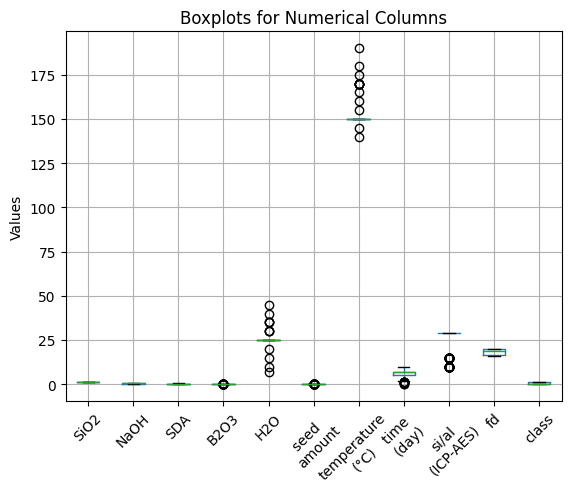

No outliers found in column 'SiO2'
No outliers found in column 'NaOH'
No outliers found in column 'SDA'
Outliers in column 'B2O3': [0.125, 0.125, 0.125, 0.125, 0.05, 0.05, 0.05, 0.05, 0.05, 0.125, 0.125, 0.125, 0.125, 0.125, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.3, 0.4, 0.005, 0.03, 0.04, 0.08, 0.12, 0.01, 0.15, 0.2, 0.3, 0.4, 0.005, 0.03, 0.04, 0.08, 0.12, 0.01, 0.15, 0.2, 0.3, 0.4, 0.005, 0.03, 0.04, 0.08, 0.12, 0.01, 0.15]
Outliers in column 'H2O': [30, 35, 7, 10, 40, 45, 20, 15, 30, 35, 30, 35]
Outliers in column 'seed 
amount': [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]
Outliers in column 'temperature
(°C)': [170, 170, 170, 170, 170, 140, 145, 155, 160, 165, 170, 175, 180, 190]
Outliers i

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [41]:
# Calculate outliers for each column
outliers_dict = {}

# Only check the columns that are numerical and would contain outliers
columns_to_check = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for specified columns
df[columns_to_check].boxplot()
plt.title("Boxplots for Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

# Check for outliers and plot the boxplot
for col in columns_to_check:
   q1 = np.quantile(df[col], 0.25)
   q3 = np.quantile(df[col], 0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
   outliers_dict[col] = outliers.tolist()

# Print outliers for each column
for col, outliers in outliers_dict.items():
   if outliers:
       print(f"Outliers in column '{col}': {outliers}")
   else:
       print(f"No outliers found in column '{col}'")

In [42]:
# Replace outliers with the mean value of the column
for col in columns_to_check:
    mean_value = df[col].mean()  # Calculate the mean of the column
    # Replace outliers with the mean value
    df[col] = df[col].apply(lambda x: mean_value if x in outliers_dict[col] else x)

# Check to make sure that the outliers were replaced with the mean value
for col in columns_to_check:
    if any(outlier in df[col].values for outlier in outliers_dict[col]):
        print(f"Outlier(s) from column '{col}' were not replaced.")
    else:
        print(f"All outliers were successfully replaced with the mean value in column '{col}'.")

All outliers were successfully replaced with the mean value in column 'SiO2'.
All outliers were successfully replaced with the mean value in column 'NaOH'.
All outliers were successfully replaced with the mean value in column 'SDA'.
All outliers were successfully replaced with the mean value in column 'B2O3'.
All outliers were successfully replaced with the mean value in column 'H2O'.
All outliers were successfully replaced with the mean value in column 'seed 
amount'.
All outliers were successfully replaced with the mean value in column 'temperature
(°C)'.
All outliers were successfully replaced with the mean value in column 'time 
(day)'.
All outliers were successfully replaced with the mean value in column 'si/al
(ICP-AES)'.
All outliers were successfully replaced with the mean value in column 'fd'.
All outliers were successfully replaced with the mean value in column 'class'.


### Encode and normalize the dataframe

Next, we need to one-hot encode the categorical variables in the dataframe. This will allow a machine learning model to handle the categorical variables by transforming them into binary vectors where if the category is true, the value is 1 and if it is false the value is 0.

In [43]:
# Get the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Print the results
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: Index(['SiO2', 'NaOH', 'SDA', 'B2O3', 'H2O', 'seed \namount',
       'temperature\n(°C)', 'time \n(day)', 'si/al\n(ICP-AES)', 'fd', 'class'],
      dtype='object')
Categorical columns: Index(['seed'], dtype='object')


In [44]:
# Perform one-hot encoding
one_hot_columns = ['seed']

df = pd.get_dummies(df, columns=one_hot_columns, prefix='', prefix_sep='')

print(df)

     SiO2  NaOH  SDA      B2O3        H2O  seed \namount  temperature\n(°C)  \
0       1  0.40  0.3  0.100000  25.000000           0.05              150.0   
1       1  0.00  0.0  0.100000  25.000000           0.05              150.0   
2       1  0.10  0.0  0.100000  25.000000           0.05              150.0   
3       1  0.20  0.0  0.100000  25.000000           0.05              150.0   
4       1  0.25  0.0  0.100000  25.000000           0.05              150.0   
..    ...   ...  ...       ...        ...            ...                ...   
379     1  0.45  0.3  0.100000  25.000000           0.05              150.0   
380     1  0.60  0.3  0.100000  25.088154           0.05              150.0   
381     1  0.50  0.3  0.100000  25.000000           0.05              150.0   
382     1  0.50  0.3  0.100000  25.000000           0.05              150.0   
384     1  0.60  0.3  0.101873  25.000000           0.05              150.0   

     time \n(day)  si/al\n(ICP-AES)    fd  class   

Finally, we can normalize the dataframe. There are a lot of different
numerical categories in this dataframe, and making sure that they are normalized
will improve the accuracy of the model and prevent it from being skewed by numbers that are very different in magnitude.

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Replace infinity values with 10,000 so that the values can be scaled

# Running this with infinity will not work so we can just use a relatively really
#large value

df.replace([np.inf, -np.inf], 10000, inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the normalized DataFrame
print(df)


     SiO2    NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  \
0     0.0  0.5000  0.5   0.0  0.0            0.0                0.0   
1     0.0  0.0000  0.0   0.0  0.0            0.0                0.0   
2     0.0  0.1250  0.0   0.0  0.0            0.0                0.0   
3     0.0  0.2500  0.0   0.0  0.0            0.0                0.0   
4     0.0  0.3125  0.0   0.0  0.0            0.0                0.0   
..    ...     ...  ...   ...  ...            ...                ...   
358   0.0  0.5625  0.5   0.0  0.0            0.0                0.0   
359   0.0  0.7500  0.5   0.0  1.0            0.0                0.0   
360   0.0  0.6250  0.5   0.0  0.0            0.0                0.0   
361   0.0  0.6250  0.5   0.0  0.0            0.0                0.0   
362   0.0  0.7500  0.5   1.0  0.0            0.0                0.0   

     time \n(day)  si/al\n(ICP-AES)        fd  class  *MRE  ERI  EUO  IWV  \
0           0.625               1.0  0.954545    0.0   1.0  0.0  0.0  

## Step 3: Exploratory Data Analysis
---
In order to understand how to train the machine learning model, we need to look at the different trends that are present in the dataset. This will allow for further understanding of the dataset and so that we can create a better machine learning model.

### Pairplots
To better understand the trends of the data, we want to then look at the pairplots to better understand if there are variables that relate strongly with one another. This will be helpful when we need to go through and reduce the dataset to make it more fit for machine learning analysis. Further, this can help us isolate which variables to target as the strongest correlations in the dataset.

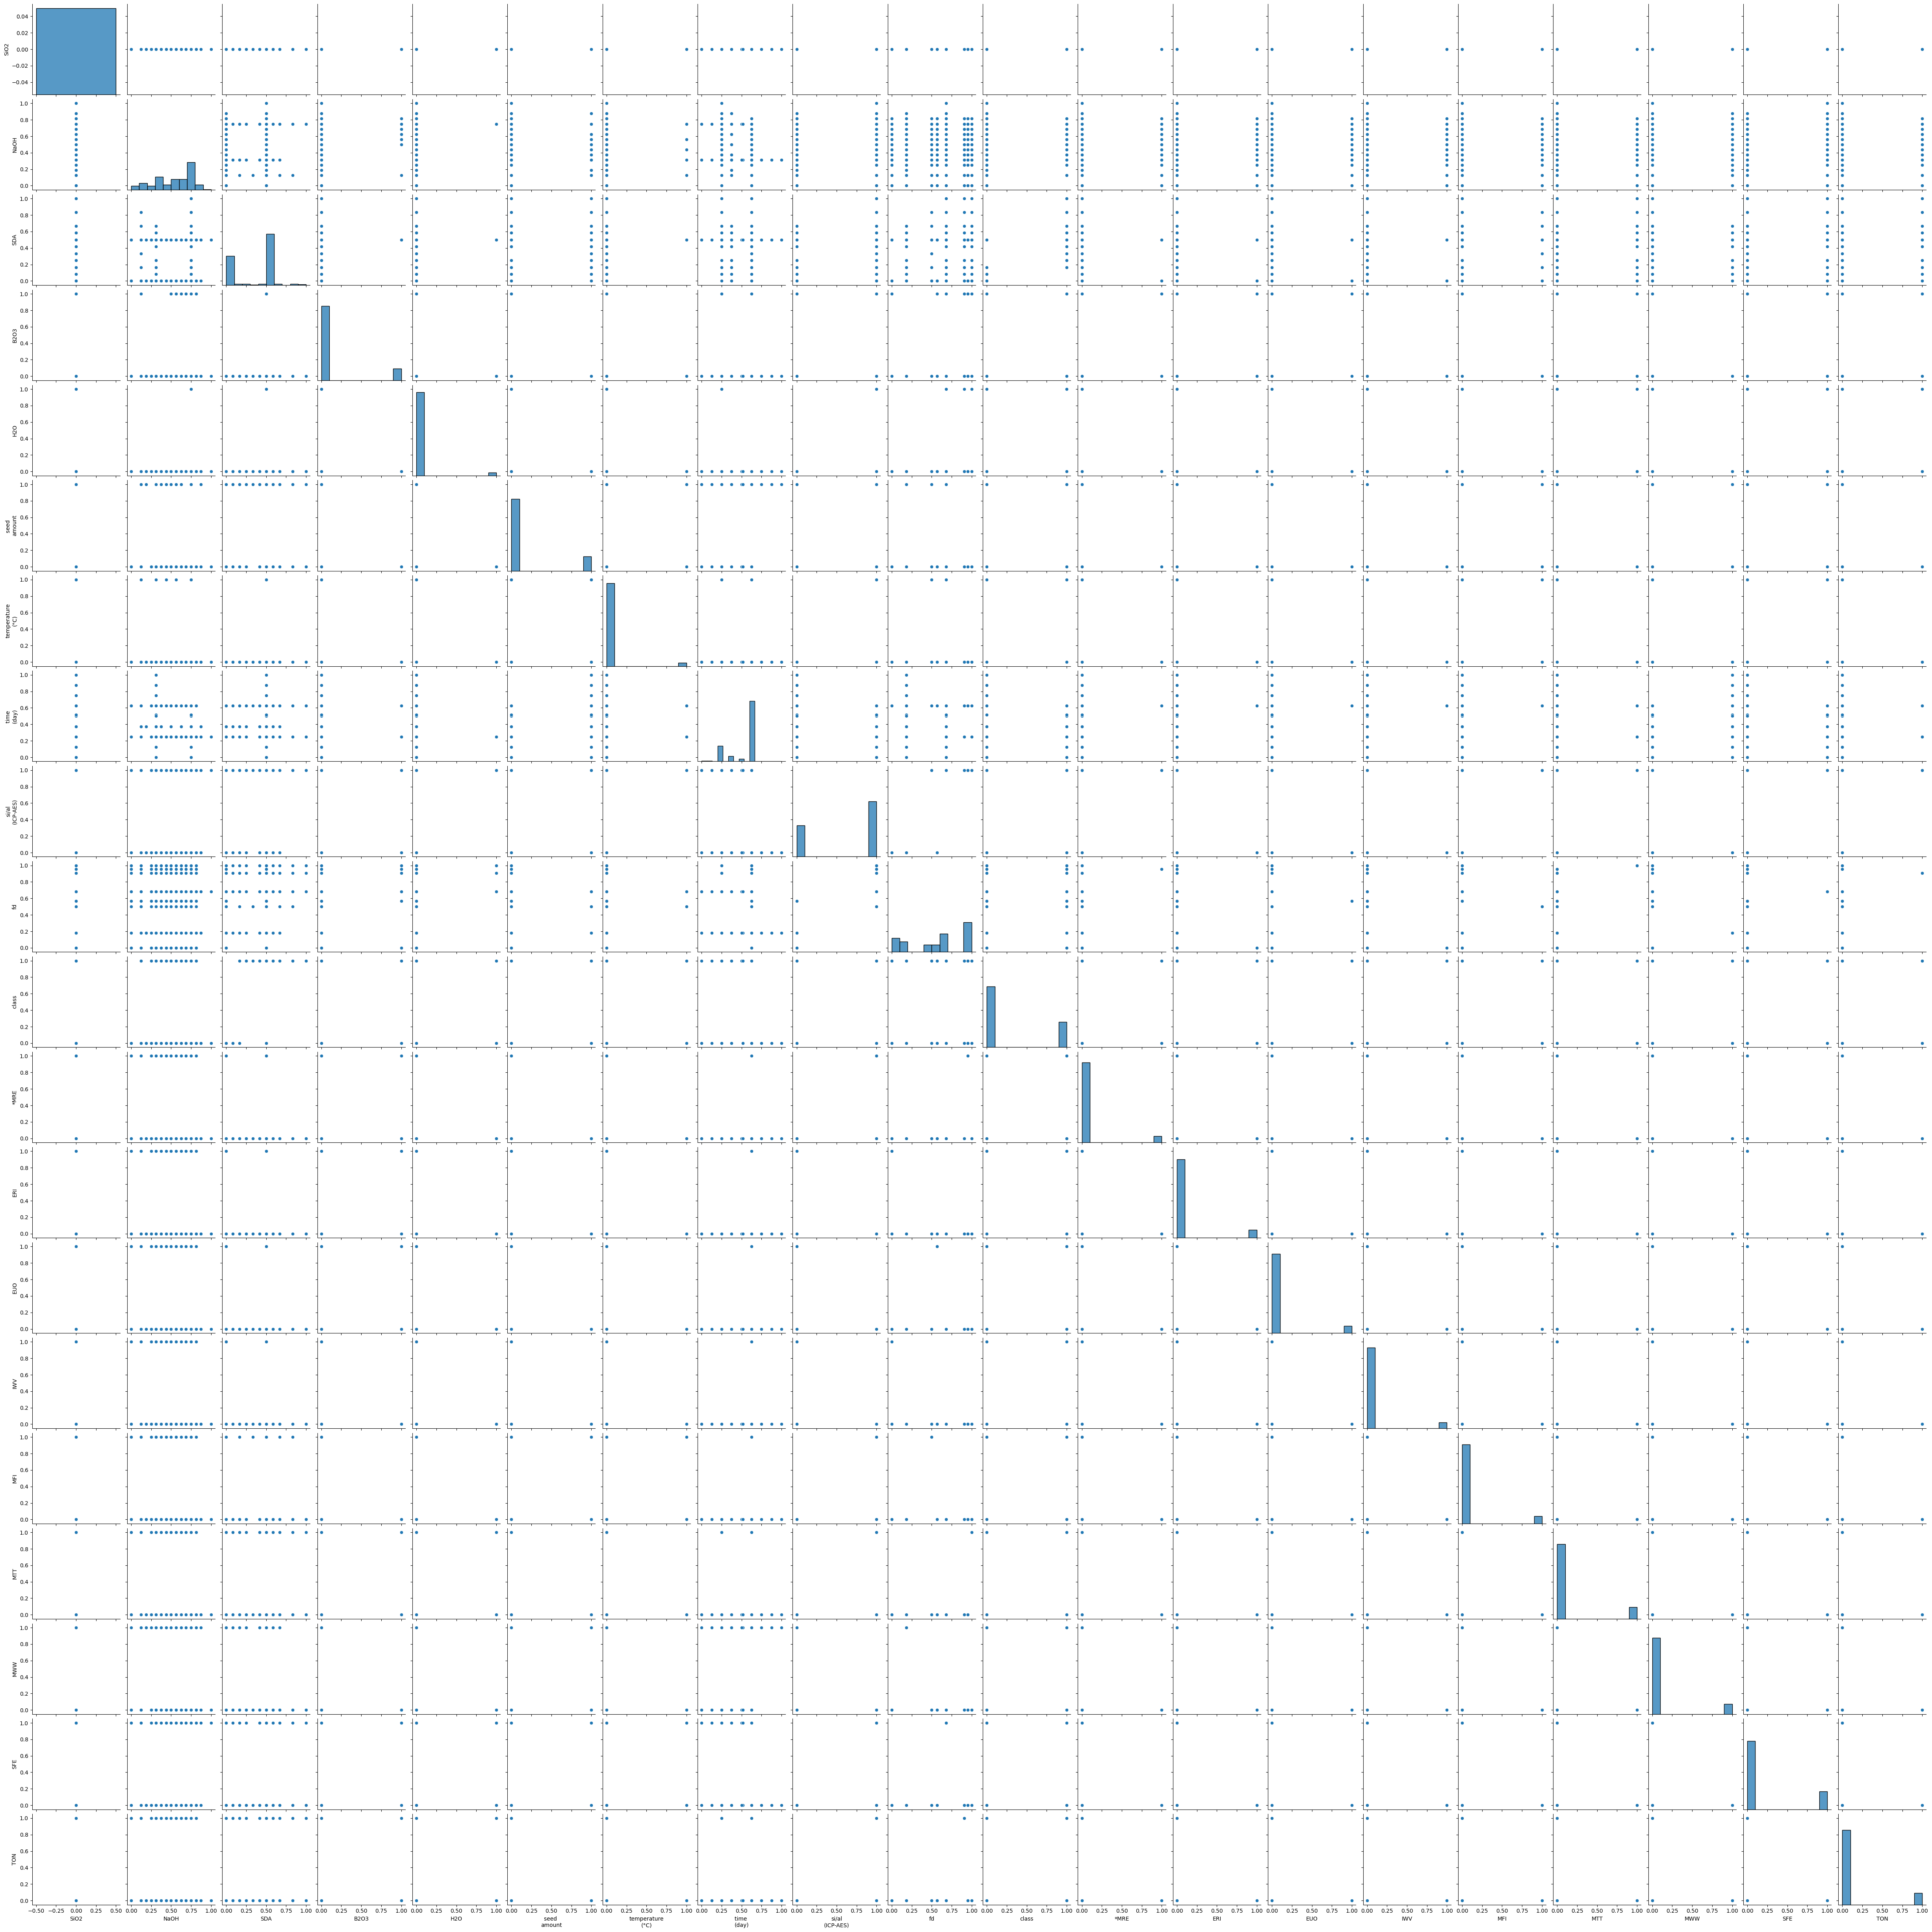

In [47]:
sns.pairplot(df)

### Correlation Matrix
To better understand the relationships between each of the different variables, we can look at a correlation matrix / heat map of the dataset. This will show how strongly each of the different variables are related to one another.

                       NaOH       SDA      B2O3  seed \namount  \
NaOH               1.000000  0.154413  0.194887      -0.092040   
SDA                0.154413  1.000000  0.211330       0.162643   
B2O3               0.194887  0.211330  1.000000      -0.138409   
seed \namount     -0.092040  0.162643 -0.138409       1.000000   
temperature\n(°C)  0.014530  0.108562 -0.043535       0.204354   
time \n(day)      -0.160890 -0.262636  0.092811      -0.331627   
si/al\n(ICP-AES)   0.148060  0.111794 -0.114906      -0.115612   
fd                 0.149521  0.104915 -0.049367      -0.242651   
class              0.257610  0.485591  0.206383       0.168591   
*MRE              -0.033269 -0.041537  0.079206      -0.144329   
ERI               -0.004662  0.006795  0.245885      -0.161221   
EUO               -0.012745 -0.016260  0.146065      -0.152921   
IWV               -0.059182 -0.069671 -0.082893      -0.135383   
MFI               -0.119336 -0.028862 -0.095343       0.252945   
MTT       

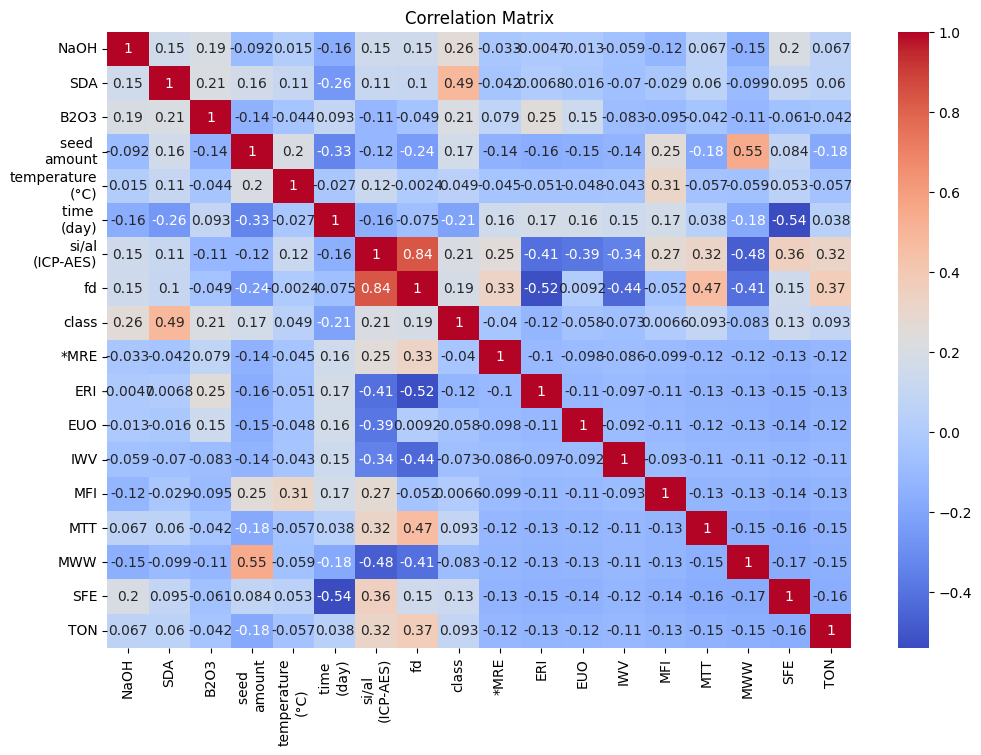

In [51]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

To prevent overfitting I will drop columns that are really insignificantly correlated.

In [58]:
df = df.drop(['temperature\n(°C)'], axis = 1)

## Step 4: Machine Learning Model

---

To determine the best machine learning model for predicting the number of pins knocked down in bowling based on throw speed and angle, we tested several different models. We used a variety of algorithms, each with unique characteristics, to evaluate their performance on our dataset. The models we tested included **Random Forest**, **Gradient Boosting**, **MLP (Multi-layer Perceptron)**, **SVR (Support Vector Regressor)**, and **Linear Regression**. By training and testing each model on the same dataset, we were able to compare their performance in terms of prediction accuracy. This process helped us identify which model achieved the best results and was most suited for our specific task, ensuring that we chose the most accurate and reliable model for bowling prediction.


Random Forest:
  Average RMSE: 0.309
  Average MAE: 0.174
  Average R² Test Score: 0.500
  Average R² Train Score: 0.878
 
Gradient Boosting:
  Average RMSE: 0.320
  Average MAE: 0.203
  Average R² Test Score: 0.464
  Average R² Train Score: 0.801
 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP:
  Average RMSE: 0.338
  Average MAE: 0.231
  Average R² Test Score: 0.402
  Average R² Train Score: 0.695
 
SVR:
  Average RMSE: 0.352
  Average MAE: 0.243
  Average R² Test Score: 0.354
  Average R² Train Score: 0.631
 
Linear Regression:
  Average RMSE: 0.359
  Average MAE: 0.259
  Average R² Test Score: 0.328
  Average R² Train Score: 0.573
 

Best model based on Test R² performance:
Model        Random Forest
R^2 Test          0.696415
R^2 Train         0.853969
Name: 3, dtype: object


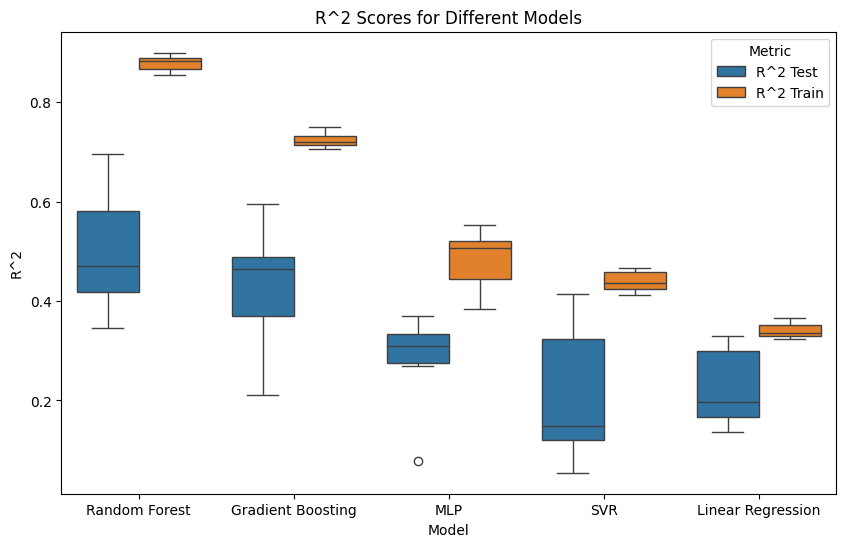

In [59]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Split the dataset into features and target
X = df.drop('class', axis=1)  # Features
Y = df['class']  # Target

# Define the number of folds for K-Fold cross-validation
n_folds = 6

# Initialize empty lists to store evaluation metrics
rmse_scores = []
mae_scores = []
r2_test_scores = []
r2_train_scores = []

# Define the models dictionary
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
}

# K-Fold cross-validation loop
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
for name, model in models.items():
    # Loop through each fold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Train the model on the training data for this fold
        model.fit(X_train, y_train)

        # Predict on the testing data for this fold
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
        rmse = np.sqrt(mse)  # Calculate RMSE manually
        mae = mean_absolute_error(y_test, y_pred)
        r2_test = r2_score(y_test, y_pred)

        # Additionally, calculate R-squared on the training data for each fold (optional)
        y_train_pred = model.predict(X_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Append the scores to the lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_test_scores.append(r2_test)
        r2_train_scores.append(r2_train)

    # Print average scores after all folds for each model
    print(f"{name}:")
    print(f"  Average RMSE: {np.mean(rmse_scores):.3f}")
    print(f"  Average MAE: {np.mean(mae_scores):.3f}")
    print(f"  Average R² Test Score: {np.mean(r2_test_scores):.3f}")
    print(f"  Average R² Train Score: {np.mean(r2_train_scores):.3f}")
    print(' ')

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
              'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting',
              'MLP', 'MLP', 'MLP', 'MLP', 'MLP', 'MLP',
              'SVR', 'SVR', 'SVR', 'SVR', 'SVR', 'SVR',
              'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression'],
    'R^2 Test': r2_test_scores,
    'R^2 Train': r2_train_scores,
})

# Select the best model based on Test R², or lowest RMSE if R² is identical
best_model_row = results_df.loc[results_df['R^2 Test'].idxmax()]

print("\nBest model based on Test R² performance:")
print(best_model_row)

# Assuming 'results_df' is the DataFrame containing the model performance metrics
models = results_df['Model']
train_r2 = results_df['R^2 Train']
test_r2 = results_df['R^2 Test']

# Melt the DataFrame for easier plotting
melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='R^2')

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='R^2', hue='Metric', data=melted_df)
plt.title('R^2 Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.legend(title='Metric')
plt.show()


Based on the above, we can see that the best model is Random Forest. So, that is the model that I will be continuing to use going forward.

Using the best model from above, we can run a 5 fold cross-validation of the model. This ensures that the model has a good test-train R2 for different splits of the dataset and that the first time wasn't just a fluke.

Train R² scores for each fold: [0.882949118607311, 0.8899222737097296, 0.8616080323306627, 0.8495819000780481, 0.9040685737895594]
Test R² scores for each fold: [0.48031298540295475, 0.2588858243661101, 0.7326352881192881, 0.7540557656695157, 0.2882550156920136]
Train RMSE scores for each fold: [0.15316601646396985, 0.14788197839282463, 0.16430427287181446, 0.1785119879329122, 0.1398387264911091]
Test RMSE scores for each fold: [0.3293623980187041, 0.3990285060886547, 0.2455885159856376, 0.19356669896649248, 0.37261095848397163]
Train MAE scores for each fold: [0.07841045076884921, 0.0728383556547619, 0.08262313988095238, 0.09687838626217532, 0.06720182291666667]
Test MAE scores for each fold: [0.2061153273809524, 0.24833407738095237, 0.12189583333333336, 0.09944921875000001, 0.2165022941468254]


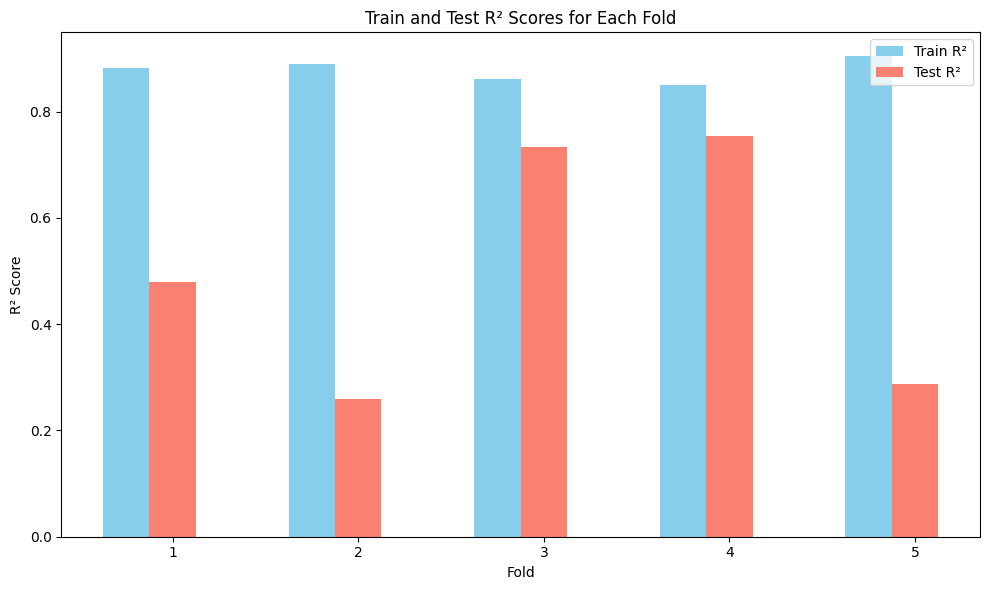

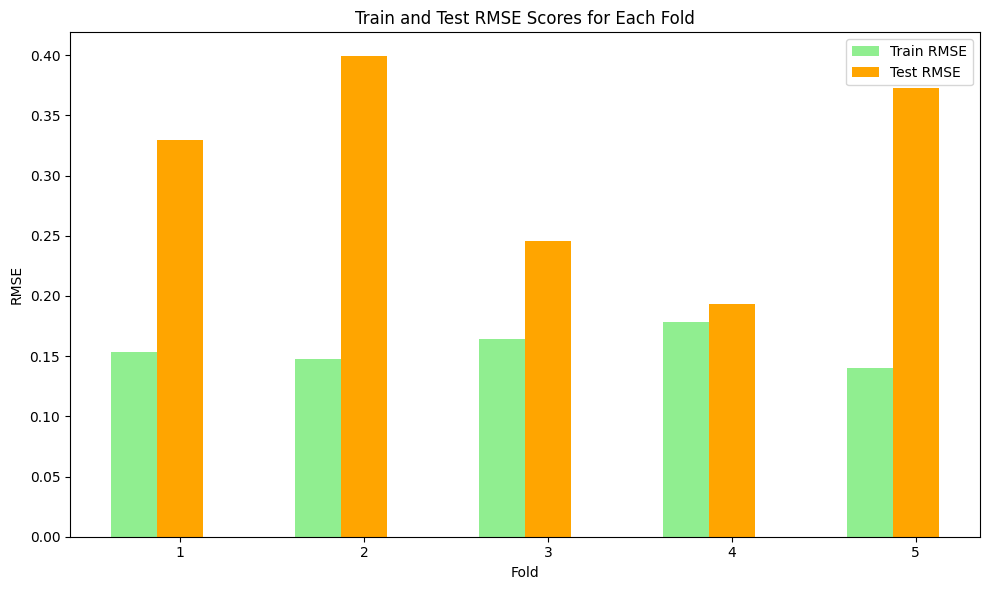

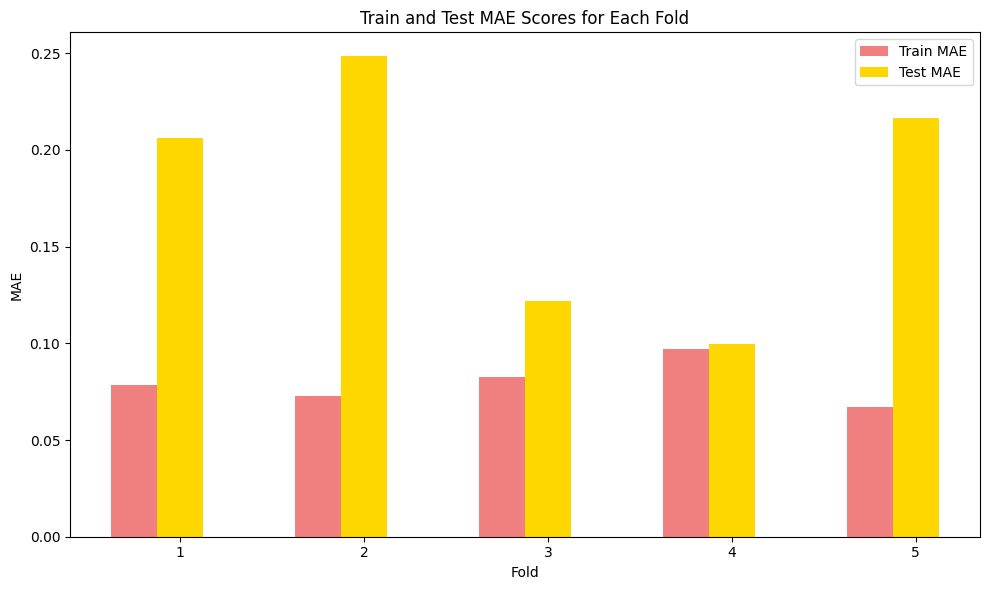

In [63]:
# Define the best model
best_model = RandomForestRegressor() # add best model from above here

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store R², RMSE, and MAE scores for each fold
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []
train_mae_scores = []
test_mae_scores = []

# Split the dataset into features and target
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

# Cross-validation loop
for train_index, test_index in kf.split(X):
    # Split data into train and test for each fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    best_model.fit(X_train, y_train)

    # Predict and calculate R², RMSE, and MAE for train and test sets
    train_r2_scores.append(r2_score(y_train, best_model.predict(X_train)))
    test_r2_scores.append(r2_score(y_test, best_model.predict(X_test)))

    train_rmse_scores.append(np.sqrt(mean_squared_error(y_train, best_model.predict(X_train))))
    test_rmse_scores.append(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))))

    train_mae_scores.append(mean_absolute_error(y_train, best_model.predict(X_train)))
    test_mae_scores.append(mean_absolute_error(y_test, best_model.predict(X_test)))

# Display R², RMSE, and MAE for each fold
print("Train R² scores for each fold:", train_r2_scores)
print("Test R² scores for each fold:", test_r2_scores)
print("Train RMSE scores for each fold:", train_rmse_scores)
print("Test RMSE scores for each fold:", test_rmse_scores)
print("Train MAE scores for each fold:", train_mae_scores)
print("Test MAE scores for each fold:", test_mae_scores)

# Plotting the R² scores for each fold
folds = np.arange(1, kf.get_n_splits() + 1)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25

# Bars for Train R²
train_bars = ax.bar(folds - bar_width, train_r2_scores, bar_width, label='Train R²', color='skyblue')

# Bars for Test R²
test_bars = ax.bar(folds, test_r2_scores, bar_width, label='Test R²', color='salmon')

# Labels and Titles
ax.set_xlabel('Fold')
ax.set_ylabel('R² Score')
ax.set_title('Train and Test R² Scores for Each Fold')
ax.set_xticks(folds)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

# Plotting the RMSE scores for each fold
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for Train RMSE
train_rmse_bars = ax.bar(folds - bar_width, train_rmse_scores, bar_width, label='Train RMSE', color='lightgreen')

# Bars for Test RMSE
test_rmse_bars = ax.bar(folds, test_rmse_scores, bar_width, label='Test RMSE', color='orange')

# Labels and Titles
ax.set_xlabel('Fold')
ax.set_ylabel('RMSE')
ax.set_title('Train and Test RMSE Scores for Each Fold')
ax.set_xticks(folds)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

# Plotting the MAE scores for each fold
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for Train MAE
train_mae_bars = ax.bar(folds - bar_width, train_mae_scores, bar_width, label='Train MAE', color='lightcoral')

# Bars for Test MAE
test_mae_bars = ax.bar(folds, test_mae_scores, bar_width, label='Test MAE', color='gold')

# Labels and Titles
ax.set_xlabel('Fold')
ax.set_ylabel('MAE')
ax.set_title('Train and Test MAE Scores for Each Fold')
ax.set_xticks(folds)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

Finally, we can export the model to a pickle file. This will allow us to export the model into a GUI-based app where the user can interact with the model. We can also export the scaler so that we can descale the outputs.

In [66]:
# Initialize and fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Save the fitted scaler to a file using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Scaler saved to 'scaler.pkl'


## Step 5: Partial Dependencies

---



Next, we can look at the partial dependency plots of each of the variables that have gone into the model.

<Figure size 800x600 with 0 Axes>

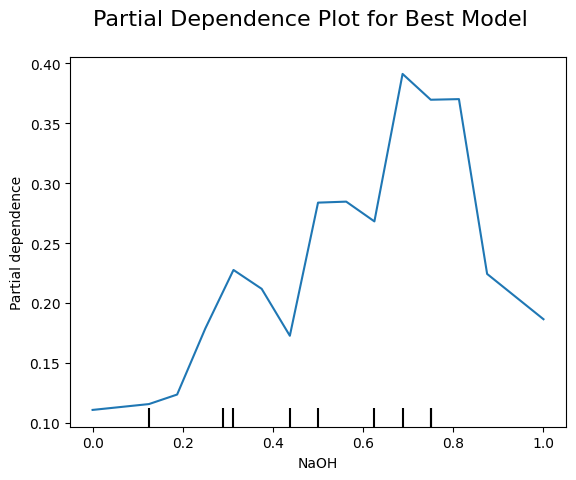

<Figure size 800x600 with 0 Axes>

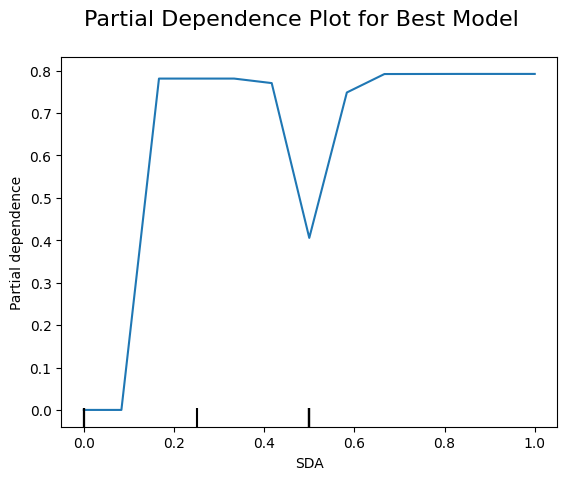

<Figure size 800x600 with 0 Axes>

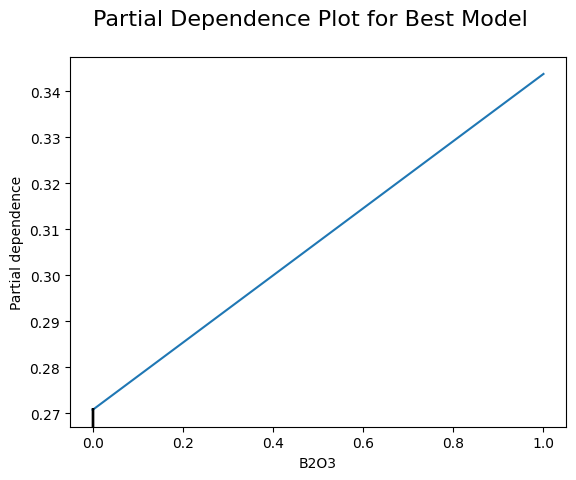

<Figure size 800x600 with 0 Axes>

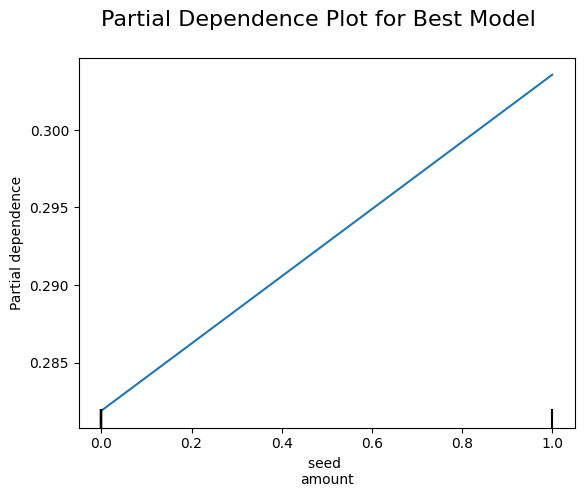

<Figure size 800x600 with 0 Axes>

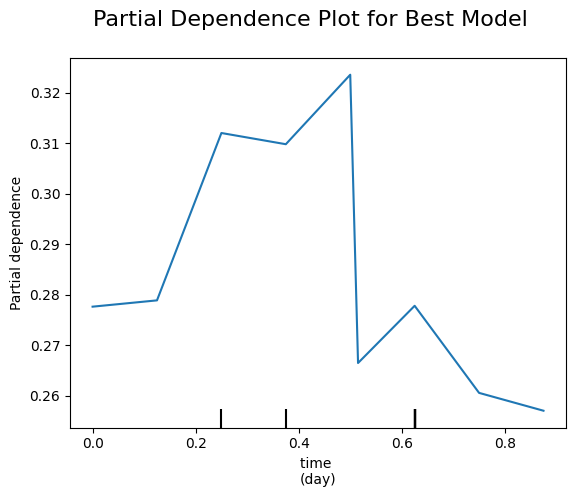

<Figure size 800x600 with 0 Axes>

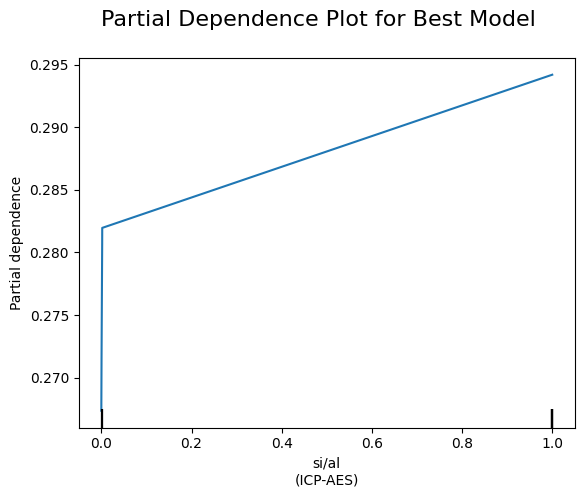

<Figure size 800x600 with 0 Axes>

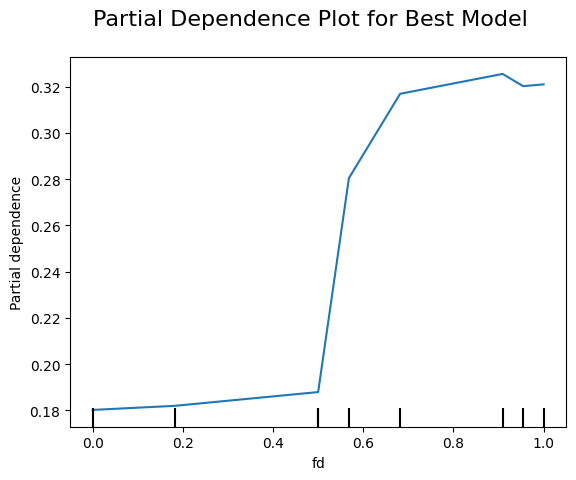

<Figure size 800x600 with 0 Axes>

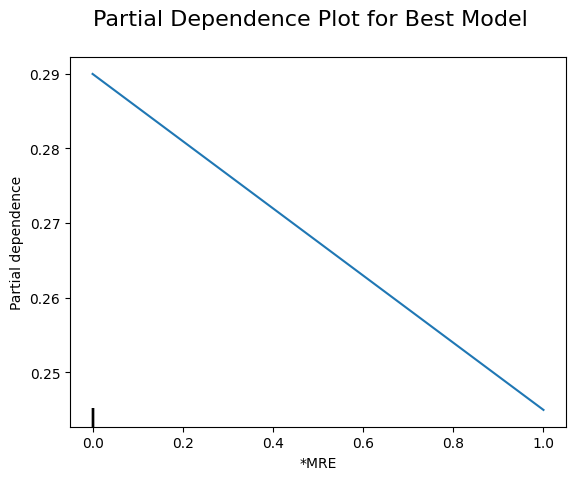

<Figure size 800x600 with 0 Axes>

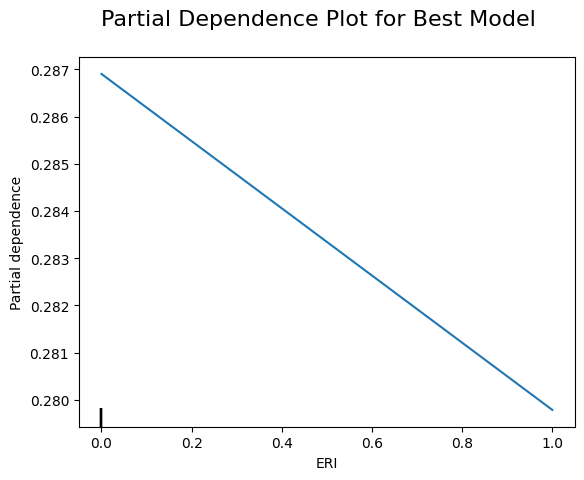

<Figure size 800x600 with 0 Axes>

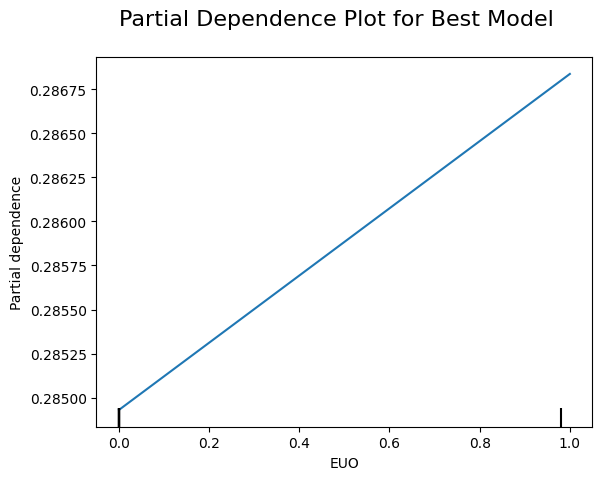

<Figure size 800x600 with 0 Axes>

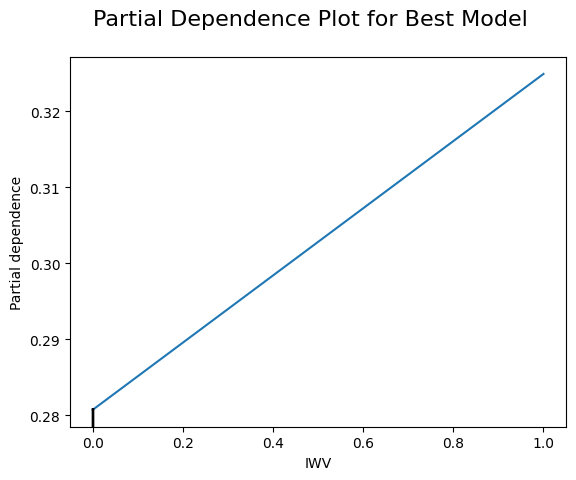

<Figure size 800x600 with 0 Axes>

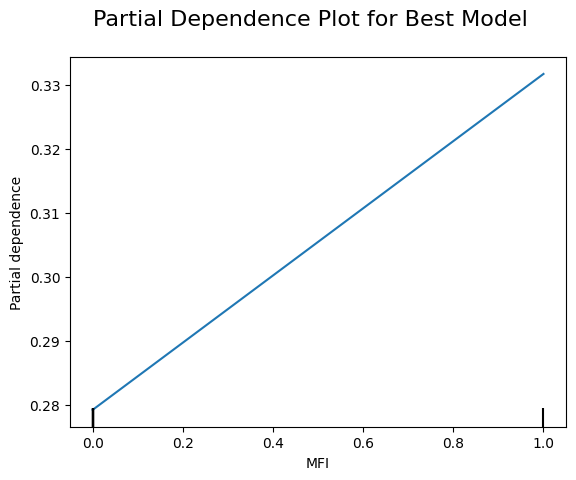

<Figure size 800x600 with 0 Axes>

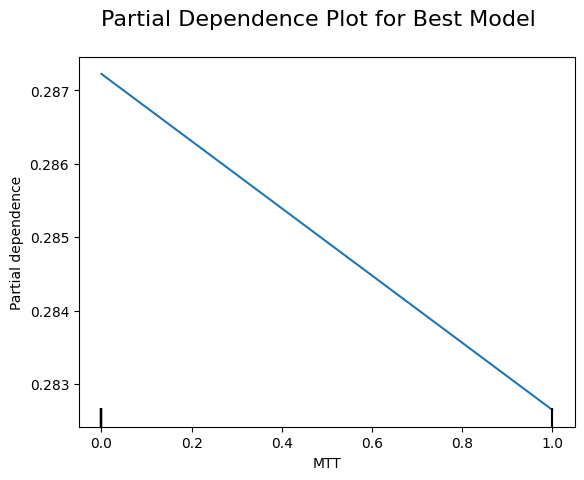

<Figure size 800x600 with 0 Axes>

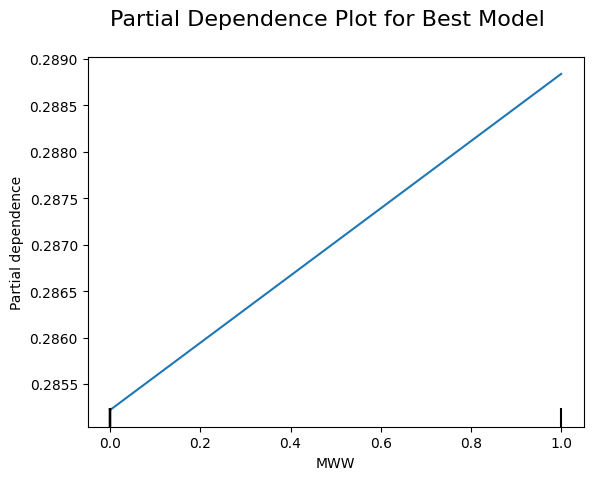

<Figure size 800x600 with 0 Axes>

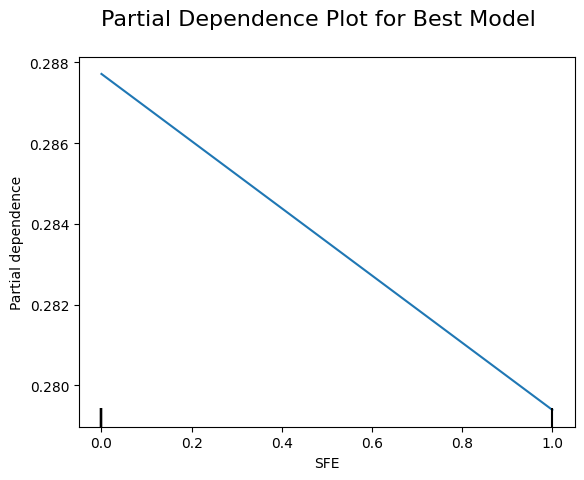

<Figure size 800x600 with 0 Axes>

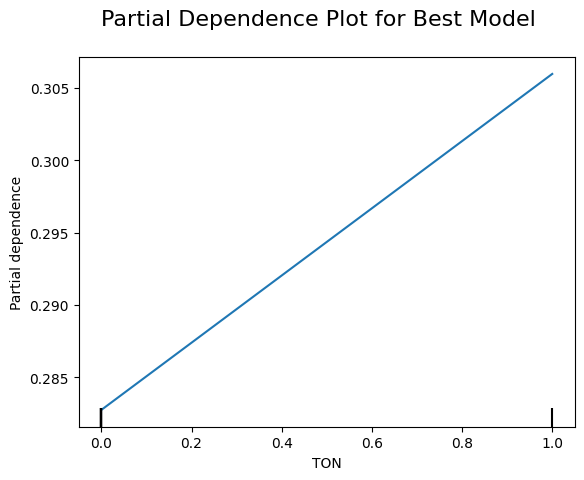

In [65]:
# Fit the best model from Randomized Search on the entire training data
best_model.fit(X_train, y_train)

# Select the features for which you want to create the PDP
features_to_plot = X.columns.tolist()  # Use all features; modify if you want to limit

# Create Partial Dependence Plots for each feature separately
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    display = PartialDependenceDisplay.from_estimator(
        best_model,
        X_train,
        features=[feature],  # Pass a list with the current feature
        grid_resolution=50
    )

    # Set axis labels and title
    ax.set_xlabel(feature)
    ax.set_ylabel('Partial Dependence')
    ax.set_title(f'Partial Dependence of {feature}')

    plt.suptitle('Partial Dependence Plot for Best Model', fontsize=16)
    plt.show()  # Display the plot

## Step 6: GUI Development

---



Finally, we can use Hugging Face to create a GUI app that will allow the user to select their input values and it will give a denormalized output value.

In [ ]:
import gradio as gr
import pickle
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Load models and scaler
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Load the pre-fitted scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Define the one-hot encoder for the `seed` categorical variable
seed_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the list of possible seed values (only need to do this once)
seed_values = ['MRE', 'ERI', 'EUO', 'IWV', 'MFI', 'MTT', 'MWW', 'SFE', 'TON']  # Example list of possible seeds
seed_encoded = seed_encoder.fit_transform(np.array(seed_values).reshape(-1, 1))  # Fit and transform known seeds

def predict(seed, NaOH, SDA, B2O3, seed_amount, time, si_al, fd):
    """
    Predict the output based on the given parameters.

    Parameters:
    - seed: Seed input variable (categorical: string)
    - NaOH: NaOH input variable (numerical)
    - SDA: SDA input variable (numerical)
    - B2O3: B2O3 input variable (numerical)
    - seed_amount: Seed amount input (numerical)
    - time: Time input variable (numerical)
    - si_al: Si/Al ratio input (numerical)
    - fd: FD input variable (numerical)

    Returns:
    - Output prediction (rounded to 2 decimal places)
    """

    # Get the index of the input `seed` in the encoded array
    seed_index = seed_values.index(seed)
    seed_vector = seed_encoded[seed_index]  # Get the one-hot encoded vector for the seed

    # Prepare the input array with the provided parameters, including the one-hot encoded seed
    input_array = np.array([[NaOH, SDA, B2O3, seed_amount, time, si_al, fd] + list(seed_vector)])

    # Scale input values using the pre-fitted scaler
    input_scaled = scaler.transform(input_array)

    # Make prediction using the best model
    output = best_model.predict(input_scaled)[0]

    return round(output, 2)  # Return the prediction rounded to 2 decimal places

# Create the Gradio interface with sliders for each input variable
iface = gr.Interface(
    fn=predict,  # The prediction function you defined earlier
    inputs=[
        # Dropdown for categorical seed variable
        gr.Dropdown(
            choices=["MRE", "ERI", "EUO", "IWV", "MFI", "MTT", "MWW", "SFE", "TON"],
            label="Seed Type"
        ),
        gr.Slider(0, 1, step=0.01, label="NaOH (mol/L)"),
        gr.Slider(0, 1, step=0.01, label="SDA (mol/L)"),
        gr.Slider(0, 1, step=0.01, label="B2O3 (%)"),
        gr.Slider(0, 1, step=0.01, label="Seed Amount (g)"),
        gr.Slider(0, 300, step=1, label="Time (min)"),
        gr.Slider(0, 1, step=0.01, label="Si/Al Ratio"),
        gr.Slider(0, 1, step=0.01, label="FD (%)"),
    ],
    outputs=gr.Label(label="Zeolite Success"),
    title="Zeolite Prediction Model",
    description="Adjust the sliders and select the features of the zeolite to predict success."
)

# Launch the interface
iface.launch(share=True)

## Final Summary

---

Overall, while there are not strong correlations present in the dataset, it is possible to create a machine learning GUI platform to predict the success of different zeolite formations.

The best model chosen was random forest, but it did not show a great test-train split. If further time permitted, I would have liked to continue to hyperparameter train the model to make sure that it worked the best it could.